# Introduction to Bayesian Statistics

-----

In this notebook, we introduce Bayes theorem, which you saw earlier in the probability lesson. In this notebook, we once again demonstrate the application of Bayes theorem by using the coin flipping example. Afterwards, we use the occurrence of a disease and different tests to demonstrate how Bayes theorem can affect our understanding of the world and lead to results that may differ from intuition.


-----

[stf]: https://blog.stata.com/2016/11/01/introduction-to-bayesian-statistics-part-1-the-basic-concepts/

## Table of Contents

[Bayes Theorem](#Bayes-Theorem)

[Bayesian Disease Calculation](#Bayesian-Disease-Calculation)

[Another Bayesian Disease Calculation](#Another-Bayesian-Disease-Calculation)

-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)

## Bayes Theorem

In a previous reading you learned about Bayes theorem, which relates conditional probabilities in a way that enables a hypothesis to be tested given an observed data set. This analysis starts with the fact that for two events $a$ and $b$, the conditional probabilities must be equal, thus $P(a | b) P(b) = P(b | a) P(a)$. If we express this as relation in terms of a Hypothesis $H$ and observed data $D$, the relation becomes Bayes theorem:

$$ P(H | D) = \frac{P(D | H) P(H)}{P(D)}$$

This reads, the probability of obtaining the hypothesis given the observed data is equal to the probability of the data given the hypothesis times the prior probability of observing the data normalized by the probability of the hypothesis.

In the Bayesian approach, we first construct a hypothesis, for example, that we are flipping a biased coin whose probability of obtaining heads is $P(H) = x$. Second, we encode our prior knowledge into a functional form, for example, that we have equally likely probability of getting either a heads or tails when flipping our coin. Finally, we compute our likelihood of obtaining a set of coin flips given the observed data. Rather than flipping a coin repeatedly, we will resort to simulations that generate a likelihood directly by using the binomial distribution.

We demonstrate this approach in the following code cell, where we first compute the prior probability of observing  $h$ heads in $n$ coin flips for a fair coin with $P(H) = 0.5$. This value is constant, regardless of how many coin flips we might simulate since the probability is uniform. Next, we simulate coin flips by using the binomial distribution. Since we want to sample uniformly over the probability space from zero to one, we write our own binomial function (and we ignore the combinations since we will normalize the result to generate a probability). Finally, we combine the likelihood and prior to generate the posterior, which we plot. We repeat this process for increasingly large numbers of coin flips. As we do this, the likelihood swamps the prior and eventually converges strongly to the _known_ biased value. This simple example demonstrates the importance of data in defining the posterior.

-----

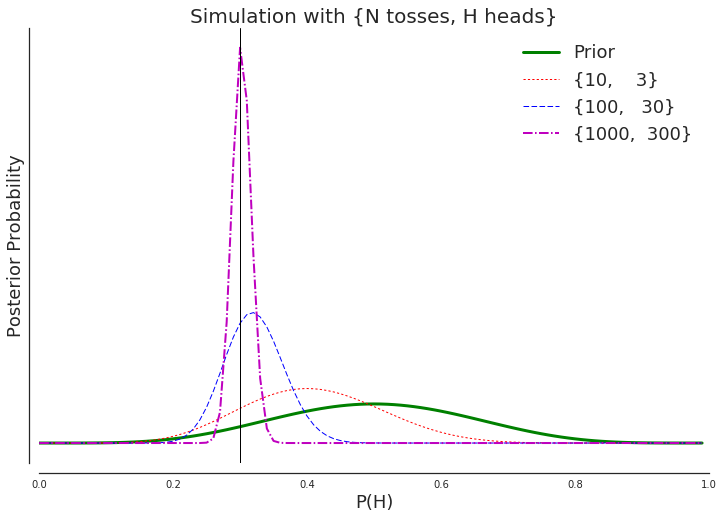

In [2]:
# Bias value
bc = 0.3

# We flip n coins and observe h heads,
def binomial(data, n, h):
    # We can ignore the combination since it divides out in the normalization
    # Build up our probabilities
    p = [(x**h * (1 - x)**(n - h)) for x in data]
    
    # Normalize probabilities
    return (p / sum(p))


fig, ax = plt.subplots(figsize=(12, 8))

# Sample points
x = np.arange(0.0, 1.0, 0.01)

# Prior is fair coin, so we assume 10 flips, 5 heads.
prior = binomial(x, 10, 5)
ax.plot(x, prior, linewidth=3, color='g', linestyle='-', label='Prior')

# Now simulate posterior for biased coin

# First, 10 coin flips
num_flips = 10
likelihood1 = binomial(x, num_flips, num_flips * bc)
post1 = likelihood1 * prior
post1 /= np.sum(post1)
ax.plot(x, post1, linewidth=1, color='r', linestyle=':', 
        label=f'{{{num_flips}, {num_flips * bc:4.0f}}}')

# Second, 100 coin flips
num_flips = 100
likelihood2 = binomial(x, num_flips, num_flips * bc)
post2 = likelihood2 * prior
post2 /= np.sum(post2)
ax.plot(x, post2, linewidth=1, color='b', linestyle='--', 
        label=f'{{{num_flips}, {num_flips * bc:4.0f}}}')

# Third, 1000 coin flips
num_flips = 1000
likelihood3 = binomial(x, num_flips, num_flips * bc)
post3 = likelihood3 * prior
post3 /= np.sum(post3)
ax.plot(x, post3, linewidth=2, color='m', linestyle='-.', 
        label=f'{{{num_flips}, {num_flips * bc:4.0f}}}')

# Decorate plot
ax.set_xlabel("P(H)", fontsize=18)
ax.set_ylabel("Posterior Probability", fontsize=18)
ax.set_title("Simulation with {N tosses, H heads}", fontsize=20)
ax.set_xlim(0, 1)
ax.set_yticks([])

# Plot biased coin value
ax.axvline(bc, 0, 1, c='k', linewidth=1, linestyle='-')
ax.legend(loc=1, fontsize = 18)

# Clean-up
sns.despine(offset = 10, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Bayesian Disease Calculation

We can employ Bayes theorem to make a calculation that involving a disease and a medical test. Assume that one out of every one thousand people have a specific disease. A new test has been developed for this disease that accurately identifies everyone with the disease, but occasionally, five times out of every one thousand tests, this testing procedure tests positive when someone does not actually have the disease. Given this information, we may ask what is the probability someone actually has the disease, given the have a positive test result?

In this problem, our prior probability of having the disease is $P(Disease) = 0.001$. We have no false negative test results, so out probability of having a positive test result given that we have the disease is $p_{pgd} = P( + | Disease) = 1.0$. Finally, the probability of being positive given that we do not have the disease is equal to the false positive rate, so $p_{pgnd} = FPR = P( + | No Disease)$. With these values, Bayes theorem tells us that

$$
P( Disease | + ) = \frac{P( + | Disease) P(Disease)}{P( + | Disease) P( Disease ) + P( + | No\ Disease ) P( No\ Disease )} \approx 0.17
$$

The following Code cell performs this calculation, showing the end result. Note that this likely seems counter-intuitive, a positive test result only means an individual have the disease approximately 17% of the time. This is merely a reflection of the low incidence rate, or prior. Thus, most people do not have the disease, so even a small false positive rate leads to many people testing positive when they have no disease. This is reflected in the second Code cell, which demonstrates the probability of having the disease as a function of the false positive rate. Notice how as the false positive rate increases, the posterior probability approaches the prior probability since the test is dominated by false positives and thus becomes ineffectual.

-----
[wcn]: https://en.wikipedia.org/




In [3]:
p_prior = 0.001 # Prior: Probability of having the disease (Prior)
p_pgd = 1.0      # (1. - FNR): Probability of being positive given you have the disease
p_pgnd = 0.005   # FPR: Probability of being positive given you do not have the disease

# Apply Bayes Theorem
posterior = p_prior * p_pgd / (p_prior * p_pgd + (1 - p_prior) * p_pgnd)

print(f'Posterior Probability: P(Disease | + Test) = {posterior:5.4f}')

Posterior Probability: P(Disease | + Test) = 0.1668


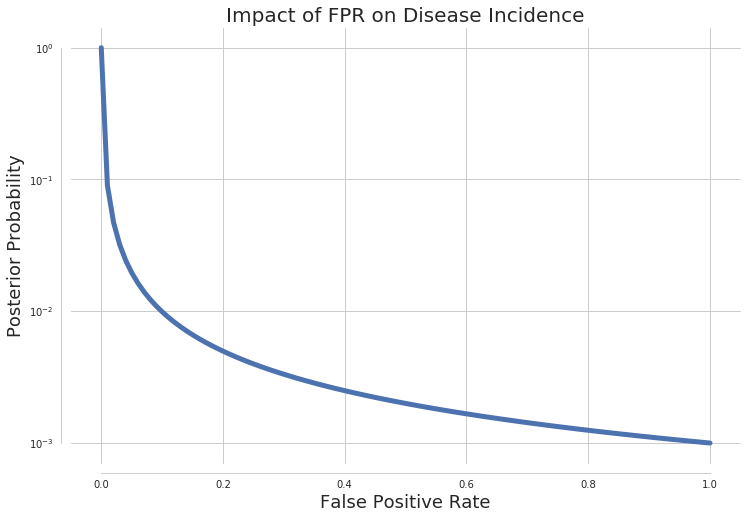

In [4]:
# Set default Seaborn plotting style
sns.set_style('whitegrid')

#Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define FNR, and compute posterior
fpr = np.linspace(0.0, 1.0, 100)
p_pgnd = fpr

# Apply Bayes Theorem
posterior = p_prior * p_pgd / (p_prior * p_pgd + (1 - p_prior) * p_pgnd)

# Plot posterior
ax.plot(fpr, posterior, lw=5)

# Decorate plot
ax.set(title='Impact of FPR on Disease Incidence', 
       xlabel='False Positive Rate', ylabel='Posterior Probability')

# Use log-scale for y-axis
ax.set_yscale('log')

# Clean-up
sns.despine(offset = 10, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Another Bayesian  Disease Calculation

We can develop a more complex disease incidence calculation by allowing the false negative rate, or the number of people who have the disease but do not test positive. In this case, we can simply reuse our previous disease example, with the caveat that our test has a five percent change of testing negative for someone who actually has the disease. 

In this case, our Bayesian calculation changes because the probability of having the disease given a positive test result is different, now being reduce by the false negative rate. Thus, our prior probability of having the disease is $P(Disease) = 0.001$. The probability of having a positive test result given that we have the disease is $p_{pgd} = P( + | Disease) = (1.0 - 0.05) = 0.95$. Finally, the probability of being positive given that we do not have the disease is equal to the false positive rate, so $p_{pgnd} = FPR = P( + | No Disease)$. With these values, Bayes theorem tells us that

$$
P( Disease | + ) = \frac{P( + | Disease) P(Disease)}{P( + | Disease) P( Disease ) + P( + | No\ Disease ) P( No\ Disease )} \approx 0.16
$$

The following Code cell performs this calculation, showing the end result. Note that this likely seems counter-intuitive, a positive test result only means an individual has the disease approximately 16% of the time. We show the impact of varying the false negative rate on this probability in the second Code cell. As the false negative rate increases, most people will not test positive for the disease, thus our conditional probability, $P( Disease | +)$ goes to zero.

-----

In [5]:
p_prior = 0.001 # Prior: Probability of having the disease (Prior)
p_pgd = (1.0 - 0.05) # (1. - FNR): Probability of being positive given you have the disease
p_pgnd = 0.005   # FPR: Probability of being positive given you do not have the disease

# Apply Bayes Theorem
posterior = p_prior * p_pgd / (p_prior * p_pgd + (1 - p_prior) * p_pgnd)

print(f'Posterior Probability: P(Disease | + Test) = {posterior:5.4f}')

Posterior Probability: P(Disease | + Test) = 0.1598


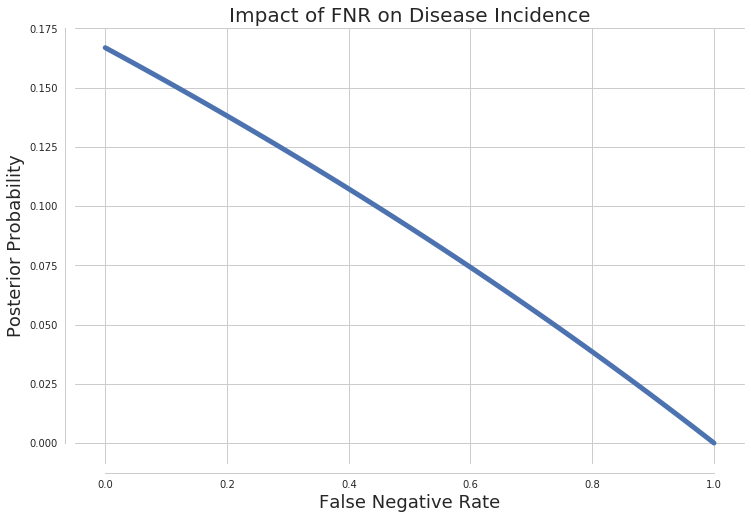

In [6]:
# Set default Seaborn plotting style
sns.set_style('whitegrid')

#Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define FNR, and compute posterior
fnr = np.linspace(0.0, 1.0, 100)
p_pgd = 1.0 - fnr

# Apply Bayes Theorem
posterior = p_prior * p_pgd / (p_prior * p_pgd + (1 - p_prior) * p_pgnd)

# Plot posterior
ax.plot(fnr, posterior, lw=5)

# Decorate plot
ax.set(title='Impact of FNR on Disease Incidence', xlabel='False Negative Rate', ylabel='Posterior Probability')

# Clean-up
sns.despine(offset = 10, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced Bayesian statistics. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the prior probability of the coin to be 70% likely to come up heads. How does the posterior change?
2. Try changing the prior probability for the two disease examples both higher and lower. How does the posterior change?
3. Make a plot that shows how the posterior probability in the second disease example depends on the false positive rate and the false negative rate. 

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. An [introductory guide][qbs] to Bayesian statistics
2. Article presenting [educational examples][bte] of using bayes theorem.
3. Article that discusses [why Bayes theorem matters][12]
4. An article introducing the [importance of Bayes theorem][32]
5. An [intuitive explanation][ie] of Bayes theorem
6. An interesting discussion on the [importance of priors][hsb]
-----

[32]: https://blog.codinghorror.com/an-initiate-of-the-bayesian-conspiracy/
[ie]: https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/


[bte]: https://courses.lumenlearning.com/math4libarts/chapter/bayes-theorem/
[12]: http://sxxz.blogspot.com/2005/03/bayes-theorem-and-why-it-matters.html

[hsb]: https://www.countbayesie.com/blog/2015/2/18/hans-solo-and-bayesian-priors

[123]: http://sxxzdata.blogspot.com/2005/03/taxicab-example-of-bayesian-thinking.html

[124]: https://datasciencebe.com/2016/10/05/bayes-in-action/

[qbs]: https://www.quantstart.com/articles/Bayesian-Statistics-A-Beginners-Guide

[ibs]: http://ipython-books.github.io/featured-07/
[ibsml]: http://nbviewer.jupyter.org/github/ipython-books/cookbook-code/blob/master/notebooks/chapter07_stats/05_mlfit.ipynb

[ch1bmh]: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb

[fbsi]: https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/4.%20Statistical%20Data%20Modeling.ipynb

[dsbsi]: https://www.datascience.com/blog/introduction-to-bayesian-inference-learn-data-science-tutorials

[babt]: http://dogdogfish.com/ab-testing/bayesian-ab-testing-using-python/
[bsbb]: http://varianceexplained.org/r/bayesian_ab_baseball/
[btr]: http://crucialconsiderations.org/rationality/bayes-theorem/


[98]: https://github.com/ericmjl/bayesian-analysis-recipes
[wer]: https://www.stat.auckland.ac.nz/~brewer/stats331.pdf
[43]: http://yudkowsky.net/rational/bayes

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode